# Activity: Address missing data 

## Introduction

The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, you will learn how to address missing data. 

You are a financial data consultant, and an investor has tasked your team with identifying new business opportunities. To help them decide which future companies to invest in, you will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Your client will use this information to learn about profitable businesses in general.

The investor has asked you to provide them with the following data: 
- Companies in the `hardware` industry based in either `Beijing`, `San Francisco`, or `London` 
- Companies in the `artificial intelligence` industry based in `London`
-  A list of the top 20 countries sorted by sum of company valuations in each country, excluding `United States`, `China`, `India`, and `United Kingdom`
- A global valuation map of all countries with companies that joined the list after 2020
- A global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a separate map for Europe is also required)

Your dataset includes a list of businesses and data points, such as the year they were founded; their industry; and their city, country, and continent. 

## **Step 1: Imports** 

In [3]:
# Import libraries and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as plex
import seaborn as sb

ModuleNotFoundError: No module named 'plotly'

### Load the dataset


The dataset is currently in CSV format and in a file named `Unicorn_Companies.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_companies = pd.read_csv("Unicorn_Companies.csv")

## **Step 2: Data exploration** 


Display the first 10 rows of the data to understand how the dataset is structured.

In [3]:
df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


### Statistical properties of the dataset

Use methods and attributes of the dataframe to get information and descriptive statistics for the data, including its range, data types, mean values, and shape. 


In [4]:
# Get the shape of the dataset.
df_companies.shape

(1074, 10)

In [6]:
# Get the data types and number of non-null values in the dataset.

df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [7]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.
df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


### Data Preprocessing

In order to answer the investor's questions, some data preprocessing steps are required. The first step is to add a new column to the dataframe containing just the year each company became a unicorn company. Call this new column `Year Joined`. 

In [16]:
# Create a new column "Year Joined" from "Date Joined".

df_companies["Year Joined"] = pd.to_datetime(df_companies["Date Joined"]).dt.year
df_companies.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [12]:
# Define the `str_to_num()` function

def str_to_num(x:str)-> int:
    x = x.strip("$B")
    return int(x)

In [112]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`
df_companies["Valuation_num"] = df_companies["Valuation"].apply(str_to_num)
df_companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valutation_num,Valuation_num
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180,180
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100,100
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100,100
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95,95
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46,46


### Find missing values

The unicorn companies dataset is fairly clean, with few missing values. 

In [31]:
# Find the number of missing values in each column in this dataset.

df_companies.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
Valutation_num       0
dtype: int64

### Review rows with missing values

Before dealing with missing values, it's important to understand the nature of the missing value that is being filled. Display all rows with missing values from `df_companies`. To do this, perform the following three steps:

1. Apply the `isna()` method to the `df_companies` dataframe as you did in the last step. Remember, this results in a dataframe of the same shape as `df_companies` where each value is `True` if its contents are `NaN` and a `False` if its contents are not `NaN`. Assign the results to a variable called `mask`.

In [33]:
# 2. Apply the `any()` method to `mask` and assign the results back to `mask`
mask = df_companies.isna().any(axis=1)
mask

0       False
1       False
2       False
3       False
4       False
        ...  
1069    False
1070    False
1071    False
1072    False
1073    False
Length: 1074, dtype: bool

In [35]:
# 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`

df_missing_rows = df_companies[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valutation_num
12,FTX,$32B,7/20/21,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


## Step 3: Model building

Think of the model you are building as the completed dataset, which you will then use to inform the questions the investor has asked of you.  

### Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and imputing other values in their place. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, you will try both. 

To compare the the effect of different actions, first store the original number of values in a variable. Create a variable called `count_total` that is an integer representing the total number of values in `df_companies`. For example, if the dataframe had 5 rows and 2 columns, then this number would be 10.

In [39]:
# Store the total number of values in a variable called `count_total`

count_total = df_companies.size
count_total

12888

Now, remove all rows containing missing values and store the total number of remaining values in a variable called `count_dropna_rows`.

In [49]:
# Drop the rows containing missing values, determine number of remaining values 
count_dropna_rows = df_companies.dropna().size
count_dropna_rows

12684

Now, remove all columns containing missing values and store the total number of cells in a variable called `count_dropna_columns`.

In [46]:
# Drop the columns containing missing values, determine number of remaining values
count_dropna_columns = df_companies.dropna(axis=1).size
count_dropna_columns

10740

Next, print the percentage of values removed by each method and compare them.

In [62]:
# Print the percentage of values removed by dropping rows.
p_rows = ((count_total - count_dropna_rows) /count_total)*100 
print("the percentage of values removed by dropping rows is:", p_rows,"%")

# Print the percentage of values removed by dropping columns.
p_columns = ((count_total - count_dropna_columns) /count_total)*100 
print("the percentage of values removed by dropping rows is:", p_columns ,"%")


the percentage of values removed by dropping rows is: 1.5828677839851024 %
the percentage of values removed by dropping rows is: 16.666666666666664 %


In [72]:
# 1. Fill missing values using the 'fillna()' method, back-filling

df_companies_backfill = df_companies.fillna(method= 'bfill')
# 2. Show the rows that previously had missing values
df_missing_rows.iloc[:]
df_companies_backfill.iloc[df_missing_rows.index, :]


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valutation_num
12,FTX,$32B,7/20/21,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,5/26/20,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,5/17/21,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,7/22/19,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,6/21/21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,9/27/21,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,9/23/21,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,1/1/15,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,9/15/21,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,6/1/21,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


## Step 4: Results and evaluation

Now that you've addressed your missing values, provide your investor with their requested data points.

### Companies in the `Hardware` Industry

Your investor is interested in identifying unicorn companies in the `Hardware` industry in the following cities: `Beijing`, `San Francisco`, and `London`. They are also interested in companies in the `Artificial intelligence` industry in `London`. 

Write a selection statement that extracts the rows that meet these criteria. This task requires complex conditional logic. Break the process into the following parts.

1. Create a mask to apply to the `df_companies` dataframe. The following logic is a pseudo-code representation of how this mask could be structured.

```
((Industry==Hardware) and (City==Beijing, San Francisco, or London)) 
OR  
((Industry==Artificial intelligence) and (City==London))
```

2. Apply the mask to the `df_companies` dataframe and assign the result to a new variable called `df_invest`.

In [105]:
# 1. Create a Boolean mask using conditional logic
# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`
citis= ["Beijing", "San Francisco" ,"London"]
mask_harw=((df_companies["Industry"] == "Hardware") & (df_companies["City"].isin(citis)))

mask_ia = ((df_companies["Industry"] == "Artificial intelligence") & (df_companies["City"] == "London"))
df_invest_hardware = df_companies[mask_harw]
df_invest_ia = df_companies[mask_ia]

df_invest= pd.concat([df_invest_ia, df_invest_hardware], ignore_index= False).sort_values(by="Industry", ascending=True)
df_invest

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valutation_num
873,BenevolentAI,$1B,6/2/15,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
1046,Tractable,$1B,6/16/21,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1
36,Bitmain,$12B,7/6/18,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,12/22/16,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,12/16/21,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,11/10/21,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
923,Geek+,$1B,11/21/18,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,10/25/18,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1


### List of countries by sum of valuation

For each country, sum the valuations of all companies in that country, then sort the results in descending order by summed valuation. Assign the results to a variable called `national_valuations`.

In [113]:
# Group the data by`Country/Region`
national_valuations= df_companies.groupby(["Country/Region"])["Valuation_num"].sum().sort_values(ascending=False).reset_index()

# Print the top 15 values of the DataFrame.
national_valuations.head(15)


,Country/Region,Valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


### Filter out top 4 outlying countries

Use this grouped and summed data to plot a barplot. However, to meet the needs of your stakeholder, you must first remove the United States, China, India, and the United Kingdom. Remove these countries from `national_valuations` and reassign the results to a variable called `national_valuations_no_big4`.

In [122]:
# Remove outlying countries

national_valuations_no_big4 = national_valuations[~national_valuations["Country/Region"].isin(["United States","China", "India", "United Kingdom"])]
national_valuations_no_big4

,Country/Region,Valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41
10,Israel,39
11,Brazil,37
12,Bahamas,32
13,Indonesia,28


### Create barplot for top 20 non-big-4 countries

Now, the data is ready to reveal the top 20 non-big-4 countries with the highest total company valuations. Use seaborn's [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function to create a plot showing national valuation on one axis and country on the other.

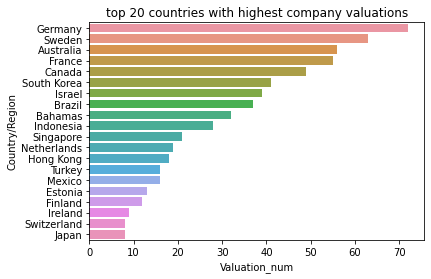

In [123]:
# Create a barplot to compare the top 20 countries with highest company valuations.

sb.barplot(data= national_valuations_no_big4.head(20), x='Valuation_num',y='Country/Region')
# Show the plot.
plt.title('top 20 countries with highest company valuations')
plt.show()

### Plot maps

Your investor has also asked for a global valuation map of all countries except `United States`, `China`, `India`, and `United Kingdom` (a.k.a. "big-four countries").

You have learned about using [`scatter_geo()`](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo) from the `plotly.express` library to create plot data on a map. Create a `scatter_geo()` plot that depicts the total valuations of each non-big-four country on a world map, where each valuation is shown as a circle on the map, and the size of the circle is proportional to that country's summed valuation.

In [128]:
# Plot the sum of valuations per country.

plex.scatter_geo(data_frame=national_valuations_no_big4, 
                 locations='Country/Region',
                 locationmode='country names',
                 size='Valuation_num',
                 color='Country/Region',
                 title='sum of valuations per country.'
                )


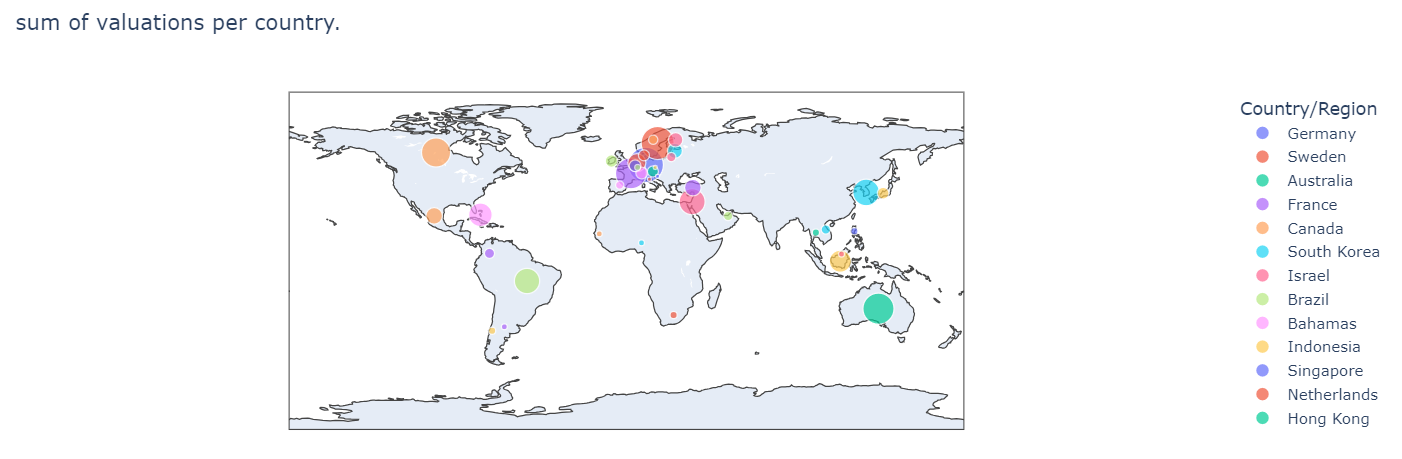

**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

